In [1]:
from sim import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# TODO

tempo na fila  
tamanho da fila x tempo  
dequeue time  



adicionar:  
    - frequencia de envio dos sensores  
    - frequencia da cpu  
    - uso da rede pela tarefa  

definir melhor:  
    - tempo de punição quando fog > 90%  
    - tempo que a tarefa leva para ser processada  
    - proporção de tarefas com alta e/ou baixa prioridade  

In [ ]:
import csv  
timeResults = list()
queueResults = list()
lbResults = list()
t0 = time.time()
print('Start Time:',t0)
f = open('testes.csv', 'r')
tests = csv.reader(f)
for test in tests:
    print(test[:4])
    simulations = [Simulation(sensors=180 ,taskResource=test[2], fogs=9, fogResources=test[1], requests=int(test[3]))]
    for s in simulations:
        s.sim()
        timeResults.append(s.processTimeResult())
        queueResults.append(s.queueTimeResult())
        lbResults.append(s.lbTimeResult())
f.close()
tf = time.time()
print('elapsed time: ', (tf-t0))

Start Time: 1562082489.0743294
['1', 'small', 'soft', '100']
['2', 'small', 'medium', '100']
['3', 'small', 'hard', '100']
['4', 'small', 'soft', '1000']
['5', 'small', 'medium', '1000']
['6', 'small', 'hard', '1000']
['7', 'small', 'soft', '10000']
['8', 'small', 'medium', '10000']
['9', 'small', 'hard', '10000']
['10', 'medium', 'soft', '100']
['11', 'medium', 'medium', '100']
['12', 'medium', 'hard', '100']
['13', 'medium', 'soft', '1000']
['14', 'medium', 'medium', '1000']
['15', 'medium', 'hard', '1000']
['16', 'medium', 'soft', '10000']


In [24]:
tests = [180]
timeResults = list()
queueResults = list()
lbResults = list()
fog_resources = ['small', 'medium', 'large']
simulations = [Simulation(sensors=i,taskResource='mixed', fogs=9, fogResources='small', requests=1) for i in tests]
for s in simulations:
    s.sim()
    timeResults.append(s.processTimeResult())
    queueResults.append(s.queueTimeResult())
    lbResults.append(s.lbTimeResult())

<class 'int'>


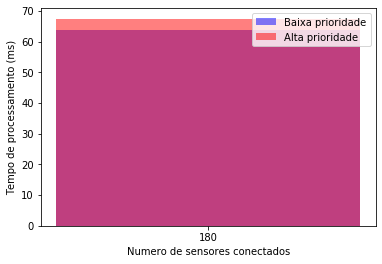

In [25]:
objects = tests
y_pos = np.arange(len(tests))

priorityResults = [x[0] for x in timeResults]
nopriorityResults = [x[1] for x in timeResults]
plt.bar(y_pos, nopriorityResults, align='center',color='b', alpha=0.5)
plt.bar(y_pos, priorityResults, align='center',color='r', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo de processamento (ms)')
plt.xlabel('Numero de sensores conectados')
plt.legend(('Baixa prioridade', 'Alta prioridade'))
plt.show()

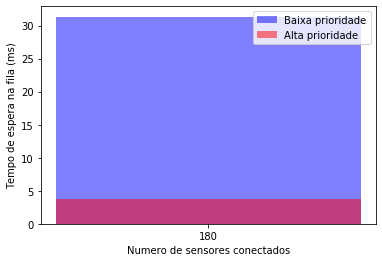

In [26]:
objects = tests
y_pos = np.arange(len(tests))
priorityResults = [x[0] for x in queueResults]
nopriorityResults = [x[1] for x in queueResults]
plt.bar(y_pos, nopriorityResults, align='center',color='b', alpha=0.5)
plt.bar(y_pos, priorityResults, align='center',color='r', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Tempo de espera na fila (ms)')
plt.xlabel('Numero de sensores conectados')
plt.legend(('Baixa prioridade', 'Alta prioridade'))
plt.show()

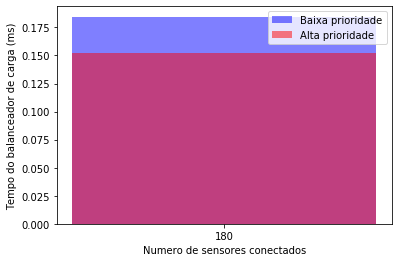

In [27]:
objects = tests
y_pos = np.arange(len(tests))

priorityResults = [x[0] for x in lbResults]
nopriorityResults = [x[1] for x in lbResults]
plt.bar(y_pos, nopriorityResults, align='center',color='b', alpha=0.5)
plt.bar(y_pos, priorityResults, align='center',color='r', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo do balanceador de carga (ms)')
plt.xlabel('Numero de sensores conectados')
plt.legend(('Baixa prioridade', 'Alta prioridade'))
plt.show()